In [23]:
from os import listdir
from numpy import asarray, load
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
from matplotlib import pyplot
import numpy as np


In [24]:
from os import listdir
from keras.preprocessing.image import load_img, img_to_array
from numpy import asarray

# load 200 images from a directory into memory
def load_images(path, size=(256, 512), num_images=200):
    src_list, tar_list = list(), list()
    
    # enumerate filenames in directory, assume all are images
    for i, filename in enumerate(listdir(path)):
        if i >= num_images:
            break  # Stop loading images once we have 200
        
        # load and resize the image
        pixels = load_img(path + filename, target_size=size)
        
        # convert to numpy array
        pixels = img_to_array(pixels)
        
        # split into satellite and map
        sat_img, map_img = pixels[:, :256], pixels[:, 256:]
        src_list.append(sat_img)
        tar_list.append(map_img)
    
    return [asarray(src_list), asarray(tar_list)]

# dataset path
path = 'cityscapes/train/'
# load the first 200 images from the dataset
[src_images, tar_images] = load_images(path, num_images=200)
print('Loaded: ', src_images.shape, tar_images.shape)




Loaded:  (200, 256, 256, 3) (200, 256, 256, 3)


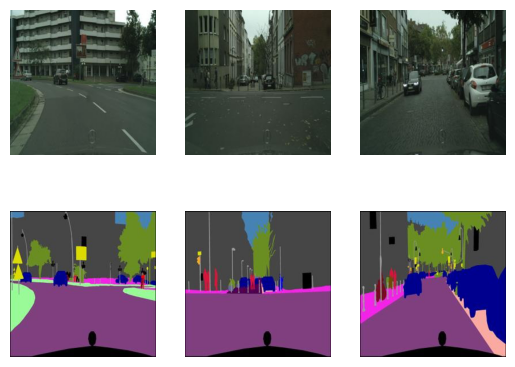

In [25]:

n_samples = 3
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(src_images[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(tar_images[i].astype('uint8'))
pyplot.show()


In [26]:

from pix2pix_model import define_discriminator, define_generator, define_gan, train
# define input shape based on the loaded dataset
image_shape = src_images.shape[1:]
# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)

#Define data
# load and prepare training images
data = [src_images, tar_images]



In [30]:
def preprocess_data(data, num_samples_to_process):
    X1, X2 = data[0][:num_samples_to_process], data[1][:num_samples_to_process]
    X1 = (X1 - 127.5) / 127.5
    X2 = (X2 - 127.5) / 127.5
    return [X1, X2]
# Set the number of samples to process (adjust as needed)
num_samples_to_process = 500  # For example, set it to 500 for approximately 50 MB usage

# Preprocess a subset of the data
dataset = preprocess_data(data, num_samples_to_process)



In [31]:

from datetime import datetime 
start1 = datetime.now() 


In [20]:

train(d_model, g_model, gan_model, dataset, n_epochs=1, n_batch=1) 
#Reports parameters for each batch (total 1096) for each epoch.
#For 10 epochs we should see 10960

stop1 = datetime.now()
#Execution time of the model 
execution_time = stop1-start1
print("Execution time is: ", execution_time)

#Reports parameters for each batch (total 1096) for each epoch.
#For 10 epochs we should see 10960


1/1 [==============================] - 1s 834ms/step
>1, d1[0.115] d2[0.240] g[10.877]
1/1 [==============================] - 0s 242ms/step
>2, d1[0.088] d2[0.720] g[14.813]
1/1 [==============================] - 0s 251ms/step


KeyboardInterrupt: 

In [32]:

#Test trained model on a few images...

from keras.models import load_model
from numpy.random import randint
model = load_model('model_002000.h5')

# plot source, generated and target images
def plot_images(src_img, gen_img, tar_img):
	images = vstack((src_img, gen_img, tar_img))
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	titles = ['Source', 'Generated', 'Expected']
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, 3, 1 + i)
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
# generate image from source
gen_image = model.predict(src_image)
# plot all three images
plot_images(src_image, gen_image, tar_image)



NameError: name 'X1' is not defined

In [33]:
X1.shape()

NameError: name 'X1' is not defined